# PANKAJ PANDEY

## Internship at Sparks Foundation -- Data Science and Business Analytics

### Task 1 -- Predicting score based on study of 9.5 hours based on given dataset using Linear Regression

Importing all Libraries

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading dataset directly from url

In [9]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported suscessfully")
data
#data.head()

Data imported suscessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visualizing our data into 2-D and see if we can manually find relationship between the data. Plotting the data using the script 

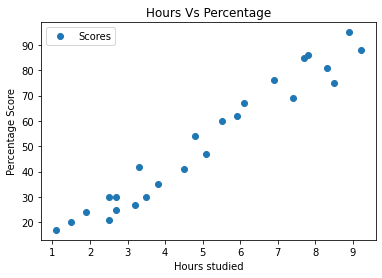

In [12]:
# plotting the distribution of scores 
data.plot(x ='Hours', y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

From graph, its clear that there is positive relation among the number of hours studied and percentage of score.

### Data Preprocessing 

Dividing the data into 'attributes'(input) and 'labels'(output)

In [20]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values

Splitting data into training and testing data using train_test_split() method of scikit_Learn.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

### Training the algorithm

After data is splitted, its time to train our algorithm

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training completed")

Training completed


### Plotting the regression line

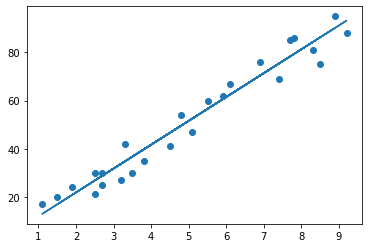

In [28]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# plotting for the test data 
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

### Making Prediction

Algorithm is trained and its time to predict the data 

In [29]:
print(X_test)   # Testing data - In hours 
Y_pred = regressor.predict(X_test)    # predicting the scores 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparision of actual and predicted data 

In [30]:
df = pd.DataFrame({'Actual':Y_test, 'predicted': Y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
# testing using our own data to for student who studies 9.25 hrs. 
hours = 9.25 
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted score = 93.69173248737538


### Evaluating the algorithm 

Evaluating the performance of algorithm. This is done to compare how well algorithms perform on a parrticular dataset. Here, we have choosed mean squared error. Other metrices can be used well.

In [39]:
from sklearn import metrics 
print("Mean squared error : ",metrics.mean_absolute_error(Y_test, Y_pred))

Mean squared error :  4.18385989900298
